This project purpose is to solve the potential flow around arbitrary airfoils using the boundary integral equation formulation, with a Kutta condition applied at the trailing edge of the airfoil. We first start the project by solving first with panel methods, based on source and doublet elements. In addition, problems based on Neumann and Dirichlet boundary conditions will be solved in this project. 

In [98]:
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy import interpolate
from math import log, cos, sin, atan2
pi = np.pi
np.set_printoptions(precision=3)

# Helper Functions

Some functions that will be used during the project, but their purpose is more for either obtaining data or the visualization of the results:

1. readAirfoilData
2. processDat
3. plotAirfoil

In [99]:
%run helperFunctions.ipynb

# Geometry

The discretization of the geometry is the first step of the problem. For this we employ Python's numerical library Scipy to describe the airfoil geometry through splines. In general, the geometry of the airfoil will be described by a parameterized curve, with parameter $t = [0, 1]$, where $t = 0$ is the parameter value when the point is on the upper trailing edge, and $t = 1$ for the lower trailing edge. 

This library also allows us to obtain the derivatives of the curve, in order to obtain either the vector tangent or normal to the curve. Since a curve can have "two" normals on a point, i.e., one points outward of the curve, the other one points inward, we must correct this behavior by using the cross product of the tangent vector and the normal curve, such that only the cross product of the tangent vector and the normal vector $ t \times n $ is either always negative or positive.

The only requirement for the points of the 2D airfoil is that the points start from the upper trailing edge, and then go to the lower trailing edge, otherwise, the behaviour of the program is not guaranteed to be correct.




In [3]:
%run geometry.ipynb

## Geometry Code Validation

To check that the code is working correctly, we employ various examples to check the correctness of the code and see there's not any issue with the expected behaviour of the program.

/Users/daniellam/Google Drive/python/Boundary Integral Method/NACA0006.dat


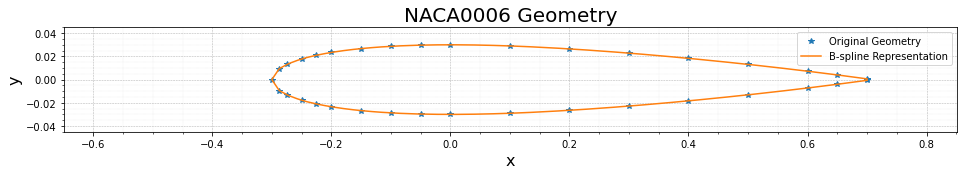

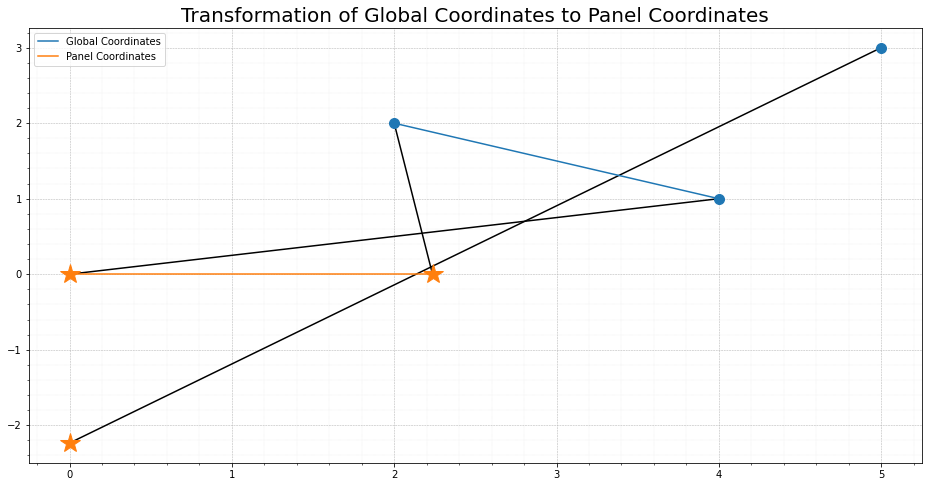

In [12]:
%run geometryCodeValidation.ipynb

# Numerical Code Based on the External Neumann Boundary Condition

Since we are interested on the lifting case of the potential flow, we will ignore any numerical method that cannot predict the lift, such as those based on source elements. We therefore start with the Constant-Strength Doublet Method, and continue from here to other methods, including those based on boundary integral methods of the class. A list of the methods that will be utilized on this problem are:
1. Constant-Strength Doublet Element Method
2. Constant-Strength Source Element & Constant-Strength Doublet Element Method
3. Constant-Strength Potential Panel Method
4. Linear-Strength Doublet Element Method
5. Linear-Strength Source Element & Linear-Strength Doublet Element Method
6. Linear-Strength Potential Panel Method
7. Linear-Strength Vortex Element Method
8. Boundary Integral Method using Trapezoidal Rule
9. Boundary Integral Method using Midpoint Rule
10. Boundary Integral Method using Gauss Quadrature

## 1. Constant-Strength Doublet Element Method

In [49]:
%run NeumannConstantStrengthDoubletMethod.ipynb

ComputeAlpha
2.356194490192345
2.356194490192345

-2.356194490192345
-2.356194490192345


GlobalToPanelCoords
(3.3306690738754696e-16, -2.23606797749979, 0, 0, 2.23606797749979, 3.3306690738754696e-16, 2.677945044588987)
( 0 -2.23606797749979 0 0 2.23606797749979 0 )

(-3.3306690738754696e-16, 2.23606797749979, 0, 0, 2.23606797749979, 3.3306690738754696e-16, 2.677945044588987)
( 0 2.23606797749979 0 0 2.23606797749979 0 )


DUB2DC
3.8981718325193755e-17 0.3183098861837907
0.0 0.3183098861837907

0.0 -0.3183098861837907
0.0 -0.3183098861837907

0.2250790790392766 0.22507907903927654
0.22507907903927651 0.22507907903927651


/Users/daniellam/Google Drive/python/Boundary Integral Method/NACA0006.dat
/Users/daniellam/Google Drive/python/Boundary Integral Method/NACA0006.dat
cond =  21089.97460374602
1.6484396901912348
cond =  14496.847045942679
1.6697339528880226
cond =  11145.949620525753
1.6886154433331526
cond =  9727.203550513466
1.7128941767146009
cond =  10188.544854357711
1.805113163117168
cond =  25719.875473316755
2.380678016362594


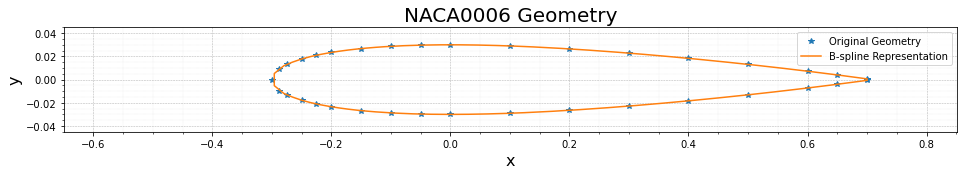

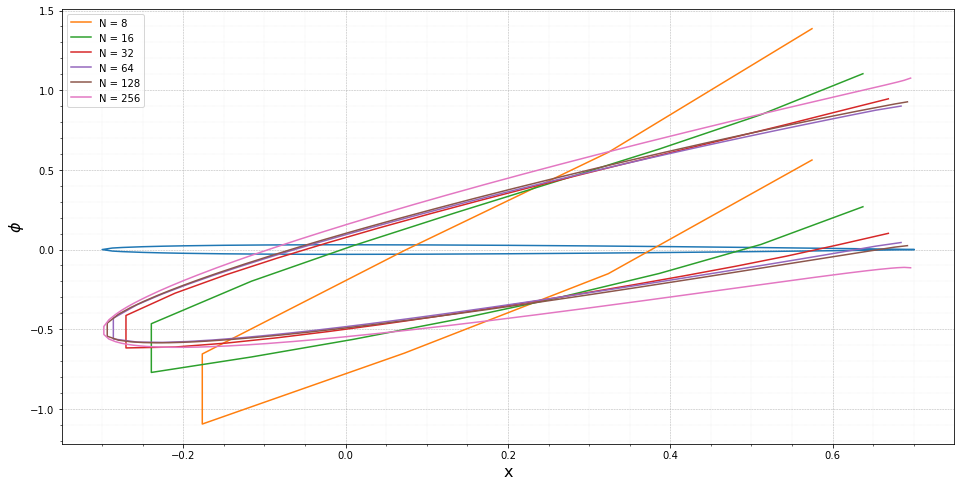

In [50]:
N = 128 + 1 
U0 = 1
AOA = 15
airfoilName = "NACA0006"
airfoilDat = ReadAirfoilDat( airfoilName )
X, Y = ProcessDat( airfoilDat )
PlotAirfoil( N, airfoilName )

# fig, ax = plt.subplots(figsize=(16, 8))
# plt.grid(b=True, which='major', linestyle='--', linewidth=.5)
# plt.grid(b=True, which='minor', linestyle='--', linewidth=.1)
# plt.minorticks_on()
# plt.xlabel(xlabel='x', fontsize=16)
# plt.ylabel(ylabel='$\phi$', fontsize=16)
# plt.plot( X, Y )

# for k in range( 3, 9 ): 
#     N = 2**k
    
#     ## generate system of eqns
#     A, b, x, y, xc, yc, txc, tyc = NeumannConstantStrengthDoubletMethod( X, Y, N, U0, AOA )
#     nu = np.linalg.solve( A, b )
#     print( nu[-1]*2 )
#     nu = nu[:-1]

#     plt.plot( xc, nu, label="N = " + str(N) )
# ax.legend()

fig, ax = plt.subplots(figsize=(16, 8))
plt.grid(b=True, which='major', linestyle='--', linewidth=.5)
plt.grid(b=True, which='minor', linestyle='--', linewidth=.1)
plt.minorticks_on()
plt.xlabel(xlabel='x', fontsize=16)
plt.ylabel(ylabel='$\phi$', fontsize=16)
plt.plot( X, Y )
    
for k in range( 3, 9 ): 
    N = 2**k
    
    ## generate system of eqns
    A, b, x, y, xc, yc, txc, tyc = NeumannConstantStrengthDoubletMethod( X, Y, N, U0, AOA )
    print( "cond = ", np.linalg.cond( A ) )
    nu = np.linalg.solve( A, b )
    print( nu[-1]*2 )
    nu = nu[:-1]

    plt.plot( xc, -nu-np.mean(-nu), label="N = " + str(N) )
ax.legend()


## 2. Constant-Strength Source Element & Constant-Strength Doublet Element Method

## 3. Constant-Potential Panel Method


Here we take $\phi$ to be constant on each of the N panels,
<center> $ \phi = \phi_j $ </center>

The equation takes the form:
<center> $ \phi_i = U_{\infty}[x_i\text{cos}(\alpha) + y_i\text{sin}(\alpha)]-\sum \phi_j \int_{\text{panel j}} \text{$\textbf{n}$} \cdot \nabla \phi_s dS - \Gamma \int_{S_W}  $ </center>
<center> for i = 1, 2, 3, ..., N </center>

where $\phi_s$ is simply the potential due to a source term of unit strength in 2 dimensions. (Actually in more simplle terms it's simply the Green function G)




In [96]:
%run NeumannConstantPotentialPanelMethod.ipynb

/Users/daniellam/Google Drive/python/Boundary Integral Method/NACA0006.dat
[[ 5.000e-01  1.292e-04  1.024e-04 ...  2.969e-02  4.078e-01 -6.532e-02]
 [ 1.292e-04  5.000e-01  1.277e-04 ...  3.345e-01  5.518e-02 -5.685e-02]
 [ 1.030e-04  1.277e-04  5.000e-01 ...  7.166e-02  1.757e-02 -5.507e-02]
 ...
 [ 5.518e-02  3.345e-01  5.059e-02 ...  5.000e-01  1.292e-04 -2.648e-02]
 [ 4.078e-01  2.969e-02  6.319e-03 ...  1.292e-04  5.000e-01 -1.801e-02]
 [ 1.000e+00  0.000e+00  0.000e+00 ...  0.000e+00 -1.000e+00 -1.000e+00]]
1.8081479695548386


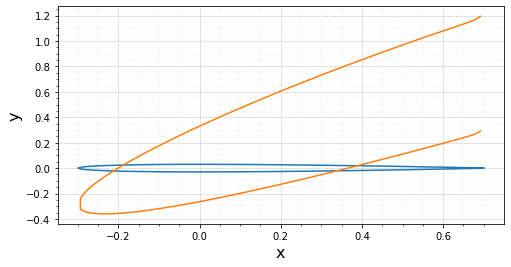

In [97]:
N = 2**7
U0 = 1
AOA = 15
airfoilName = "NACA0006"
airfoilDat = ReadAirfoilDat( airfoilName )
X, Y = ProcessDat( airfoilDat )
# PlotAirfoil( N, airfoilName )


A, b, x, y, xc, yc = NeumannConstantPotentialPanelMethod( X, Y, N, U0, AOA )
print( A ) 


fig, ax = plt.subplots(figsize=(8, 4))
plt.grid(b=True, which='major', linestyle='--', linewidth=.5)
plt.grid(b=True, which='minor', linestyle='--', linewidth=.1)
plt.minorticks_on()
plt.xlabel(xlabel='x', fontsize=16)
plt.ylabel(ylabel='y', fontsize=16)
nu = np.linalg.solve( A, b )
# nu, res, rank, s  = np.linalg.lstsq( A, b )
print( nu[-1]*2 )
nu = nu[:-1]
plt.plot( X, Y )
plt.plot( xc, nu )



## 4. Linear-Strength Doublet Element Method



## 5. Linear-Strength Source Element & Linear-Strength Doublet Element Method


## 6. Linear-Strength Potential Panel Method


## 7. Boundary Integral Method using Trapezoidal Rule


## 8. Boundary Integral Method using Midpoint Rule


## 9. Boundary Integral Method using Gauss Quadrature

In [104]:
from math import sqrt
rho = 1025
U = .15*sqrt(9.81*.48)
S = .110 - 0.04
RT = .04/2
CT = RT/(.5*rho*U*U*S)
print( CT )

0.0052619331105693955
